In [1247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Оценка структуры данных

In [1248]:
df = pd.read_parquet('data.parquet')
df.head()

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Country,Afghanistan,1850,AFG,3752993,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.436,0.629,NaN,NaN
1,Country,Afghanistan,1851,AFG,3767956,NaN,0.0,0.0,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,7.500,0.633,NaN,NaN
2,Country,Afghanistan,1852,AFG,3783940,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.560,0.637,NaN,NaN
3,Country,Afghanistan,1853,AFG,3800954,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.620,0.641,NaN,NaN
4,Country,Afghanistan,1854,AFG,3818038,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.678,0.644,NaN,NaN


In [1249]:
df.shape

(1044, 80)

In [1250]:
df.tail(n=5)

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
1039,Country,Antigua and Barbuda,2019,ATG,91377,NaN,0.0,0.0,0.641,0.026,...,NaN,0.001,0.0,0.0,0.0,0.0,0.714,0.704,NaN,NaN
1040,Country,Antigua and Barbuda,2020,ATG,91864,NaN,0.0,0.0,0.619,-0.022,...,NaN,0.001,0.0,0.0,0.0,0.0,0.691,0.681,NaN,NaN
1041,Country,Antigua and Barbuda,2021,ATG,92358,NaN,0.0,0.0,0.638,0.018,...,NaN,0.001,0.0,0.0,0.0,0.0,0.710,0.700,NaN,NaN
1042,Country,Antigua and Barbuda,2022,ATG,92851,NaN,0.0,0.0,0.618,-0.019,...,NaN,0.001,0.0,0.0,0.0,0.0,0.691,0.681,NaN,NaN
1043,Country,Antigua and Barbuda,2023,ATG,93333,NaN,0.0,0.0,0.645,0.027,...,NaN,0.001,0.0,0.0,0.0,0.0,0.717,0.708,NaN,NaN


In [1251]:
df.dtypes

,0
Description,object
Name,object
year,int64
iso_code,object
population,int64
...,...
temperature_change_from_n2o,float64
total_ghg,float64
total_ghg_excluding_lucf,float64
trade_co2,float64


In [1252]:
min_year = df['year'].min()
max_year = df['year'].max()
countries_count = df['Name'].nunique()
iso_count = df['iso_code'].nunique()

# Выводы по контексту
print(f"Период данных: с {min_year} по {max_year} год.")
print(f"Уникальных стран: {countries_count} (по полю 'Name'), уникальных кодов ISO: {iso_count}.")

Период данных: с 1850 по 2023 год.
Уникальных стран: 6 (по полю 'Name'), уникальных кодов ISO: 6.


Данные представляют собой *панельный* набор по странам и годам, содержащий показатели выбросов CO2, населения, ВВП и других метрик.

Формат — Parquet, частота — годовая, период — 1850–2023 гг.

Основные бизнес-правила: уникальность записей по стране и году, неотрицательность показателей эмиссии, целочисленность населения.

### Структурная поверка

In [1253]:
# Проверка наличия столбцов
expected_columns = ['Name', 'year', 'iso_code', 'population', 'co2']
missing_columns = [col for col in expected_columns if col not in df.columns]

Зачем? Убедиться, что в данных есть все нужные мне столбцы. Если какого-то столбца нет, значит дальнейший анализ невозможен.

In [1254]:
# Проверка типов ключевых столбцов (хотя в parquet все уже сделано, но для сохранения структуры кода оставлю)
name_type = df['Name'].dtype
year_type = df['year'].dtype
iso_code_type = df['iso_code'].dtype
population_type = df['population'].dtype

Зачем доп. проверка? Убедиться, что названия стран - это текст (object), а не числа; год - это целое число, а не текст; население - это число, а не текст.

In [1255]:
# Проверка уникальности комбинации страна-год (первичный ключ)
key_duplicates = df.duplicated(subset=['Name', 'year']).sum()

Зачем? Убедиться, что нет дубликатов "страна+год".

In [1256]:
# Проверка диапазона лет
year_range = (df['year'].min(), df['year'].max())

Зачем? Проверить, что данные за те годы, которые нужны (1850-2023), а не, например, за 1500 год.

In [1257]:
# Проверка населения
population_positive = (df['population'] > 0).all()

Зачем? Население не может быть отрицательным или нулевым.

In [1258]:
# Вывод
structural_check = {
    'missing_columns': missing_columns,
    'name_type': name_type,
    'year_type': year_type,
    'iso_code_type': iso_code_type,
    'population_type': population_type,
    'key_duplicates': key_duplicates,
    'year_range': year_range,
    'population_positive': population_positive
}

structural_check

{'missing_columns': [],
 'name_type': dtype('O'),
 'year_type': dtype('int64'),
 'iso_code_type': dtype('O'),
 'population_type': dtype('int64'),
 'key_duplicates': np.int64(0),
 'year_range': (1850, 2023),
 'population_positive': np.True_}

Вывод:

- Отсутствующих столбцов нет

- Типы данных соответствуют ожиданиям (объект для названий, целые для года и населения)

- Нет дубликатов по ключу (страна + год)

- Года в диапазоне 1850-2023

- Население всегда положительное

Структура данных корректна.

#### Оценка целостности и полноты

In [1259]:
# Оценка пропусков
missing_data = df.isna().sum()
columns_with_missing = missing_data[missing_data > 0]
print(f"Столбцы с пропусками: {len(columns_with_missing)}")
print("Количество пропусков по столбцам:")
print(columns_with_missing)

Столбцы с пропусками: 62
Количество пропусков по столбцам:
gdp                             744
cement_co2                      368
cement_co2_per_capita           368
co2                             588
co2_growth_abs                  594
                               ... 
temperature_change_from_co2       6
temperature_change_from_ghg       6
temperature_change_from_n2o       6
trade_co2                      1011
trade_co2_share                1011
Length: 62, dtype: int64


Я cчитаю, сколько пустых ячеек в каждом столбце

Зачем? Чтобы понять, в каких столбцах есть проблемы с данными.

In [1260]:
# Доля пропусков по каждому столбцу
missing_percentage = (df.isna().mean() * 100).round(2)
high_missing_columns = missing_percentage[missing_percentage > 0]
print("Столбцы с пропусками (>0%):")
print(high_missing_columns)

Столбцы с пропусками (>0%):
gdp                            71.26
cement_co2                     35.25
cement_co2_per_capita          35.25
co2                            56.32
co2_growth_abs                 56.90
                               ...  
temperature_change_from_co2     0.57
temperature_change_from_ghg     0.57
temperature_change_from_n2o     0.57
trade_co2                      96.84
trade_co2_share                96.84
Length: 62, dtype: float64


Нужно заполнить пропуски, зачем нам сломанные данные?

К тому же, столбцы с >80% пропусков не несут репрезентативной информации для анализа и их удаление минимально повлияет на общую структуру данных.

In [1261]:
# Удаляем столбцы где пропусков > 80%
columns_to_drop = high_missing_columns[high_missing_columns > 80].index
df_clean = df.drop(columns=columns_to_drop)
print(f"Удалено столбцов: {len(columns_to_drop)}")

Удалено столбцов: 11


Вот например! В столбцах trade_co2 и trade_co2_share пропусков было 96%. Такие столбцы разве нужны для анализа? В них почти нет данных. Их удаление не вредит, а только улучшает качество.

In [1262]:
print(df_clean.isna().sum().sum())

29642


In [1263]:
# Заполняем все числовые столбцы медианами
cols_with_missing = df_clean.columns[df_clean.isna().any()]

for col in cols_with_missing:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean.isna().sum().sum()

np.int64(0)

Почему я использовала медиану для заполнения пропусков? Потому что в данных о выбросах CO₂ часто встречаются страны с очень высокими и очень низкими показателями. Медиана как раз хорошо подходит в таких случаях, потому что она не реагирует на резкие выбросы и показывает "типичное" значение для большинства стран, сохраняя реальную картину распределения данных.

Заполнение модой здесь не подойдет, потому что у нас числа,  а не категоиальые переменные. Мода может не отразить типичное значение. Например, если мода в данных о выбросах CO₂ окажется 0.5, это не значит, что это "нормальный" уровень выбросов, тк это может быть простое совпадение. А вот медиана всегда показывает настоящую середину распределения. Это значение, которое делит данные пополам, что гораздо лучше представляет типичный уровень выбросов для большинства стран.

In [1264]:
# Проверка уникальности
unique_countries = df['Name'].nunique()
unique_iso_codes = df['iso_code'].nunique()
print(f"Уникальных стран: {unique_countries}")
print(f"Уникальных ISO кодов: {unique_iso_codes}")

Уникальных стран: 6
Уникальных ISO кодов: 6


In [1265]:
#Проверка дубликатов по ключевым полям
duplicate_ids = df.duplicated(subset=['Name', 'year']).sum()
duplicate_iso_year = df.duplicated(subset=['iso_code', 'year']).sum()
print(f"Дубликатов по (страна, год): {duplicate_ids}")
print(f"Дубликатов по (ISO код, год): {duplicate_iso_year}")

Дубликатов по (страна, год): 0
Дубликатов по (ISO код, год): 0


In [1266]:
# Проверка полноты временного ряда
years_per_country = df.groupby('Name')['year'].agg(['min', 'max', 'count'])
incomplete_timeseries = years_per_country[years_per_country['count'] < (2023-1850+1)]
print(f"Стран с неполными данными: {len(incomplete_timeseries)}")
print("Пример стран с неполными данными:")
print(incomplete_timeseries.head())

Стран с неполными данными: 0
Пример стран с неполными данными:
Empty DataFrame
Columns: [min, max, count]
Index: []


In [1267]:
#Проверка наличия всех лет для каждой страны
expected_years = set(range(1850, 2024))
country_year_completeness = {}
for country in df['Name'].unique():
    country_years = set(df[df['Name'] == country]['year'])
    missing_years = expected_years - country_years
    if missing_years:
        country_year_completeness[country] = len(missing_years)
print(f"{country}: пропущено {len(missing_years)} лет")

Antigua and Barbuda: пропущено 0 лет


### Вывод
Есть хорошие новости:
1) Нет дубликатов - идеально! каждая запись уникальна

2) Полные временные ряды - у всех 6 стран данные за весь период 1850-2023

3) Уникальные идентификаторы - 6 стран и 6 ISO кодов, всё совпадает

Плохие новости:
1. Пропуски в данных:

`trade_co2 `и `trade_co2_share` - 96.84% пропусков

`gdp` - 71.26% пропусков (ВВП есть только у 29% записей)

`co2` и связанные метрики - 56% пропусков

2. Умеренные пропуски:

`cement_co2` и производные - 35% пропусков

3. Незначительные пропуски:

Температурные показатели - всего 0.57% пропусков

Что с этим делать?

Данные структурно целостны (нет дубликатов, полные временные ряды), но содержат значительные проблемы с полнотой - многие важные метрики имеют высокий процент пропусков.

Это означает, что для анализа нужно будет:

1) Использовать столбцы с малым процентом пропусков

2) Либо применять методы заполнения пропусков

3) Удалить некоторые столбцы из анализа

Что сделала я: удалила некоторые столбцы с большим процентом пропусков, а остальные заполнила медианой.

### Семантический анализ

In [1268]:
# Проверка диапазонов значений и распределений
population_range = (df['population'].min(), df['population'].max())
year_range = (df['year'].min(), df['year'].max())
print(f"Население: от {population_range[0]:,} до {population_range[1]:,}")
print(f"Годы: от {year_range[0]} до {year_range[1]}")

Население: от 3,278 до 46,164,221
Годы: от 1850 до 2023


In [1269]:
# Анализ единиц измерения
if 'co2' in df.columns:
    co2_stats = df['co2'].describe()
    print(f"CO2 (млн тонн): среднее {co2_stats['mean']:.2f}, макс {co2_stats['max']:.2f}")

if 'co2_per_capita' in df.columns:
    co2_per_capita_stats = df['co2_per_capita'].describe()
    print(f"CO2 на душу (тонн): среднее {co2_per_capita_stats['mean']:.2f}, макс {co2_per_capita_stats['max']:.2f}")

if 'gdp' in df.columns:
    gdp_stats = df['gdp'].describe()
    print(f"ВВП (млрд $): среднее {gdp_stats['mean']:.2f}, макс {gdp_stats['max']:.2f}")

CO2 (млн тонн): среднее 14.39, макс 184.56
CO2 на душу (тонн): среднее 2.05, макс 19.69
ВВП (млрд $): среднее 66495699124.69, макс 595820000000.00


In [1270]:
# Проверка соответствия бизнес-логике
negative_co2 = (df['co2'] < 0).sum() if 'co2' in df.columns else 0
negative_population = (df['population'] < 0).sum()
invalid_years = ((df['year'] < 1850) | (df['year'] > 2023)).sum()
print(f"Отрицательные значения CO2: {negative_co2}")
print(f"Отрицательное население: {negative_population}")
print(f"Невалидные годы: {invalid_years}")

Отрицательные значения CO2: 0
Отрицательное население: 0
Невалидные годы: 0


In [1271]:
# Анализ производных признаков
if all(col in df.columns for col in ['co2', 'population', 'co2_per_capita']):
    # Проверка расчета co2_per_capita
    calculated_co2_per_capita = (df['co2'] * 1e6) / df['population']
    co2_calc_deviation = (abs(calculated_co2_per_capita - df['co2_per_capita']) / df['co2_per_capita']).mean()
print(f"Среднее отклонение расчета CO2 на душу: {co2_calc_deviation:.2%}")

Среднее отклонение расчета CO2 на душу: 0.53%


#### Выводы
1. Данные в целом хорошие: нет отрицательных значений там, где они не должны быть (население, CO2), все годы в правильном диапазоне.

2. Производные показатели (например, CO2 на душу населения) рассчитываются правильно (отклонение всего 0.53%).

3. Есть один момент: ВВП имеет очень большой разброс (от нормальных до очень больших значений), что может быть из-за различий между странами или выбросов. Это нужно учесть в дальнейшем.

### Поиск выбросов и аномалий

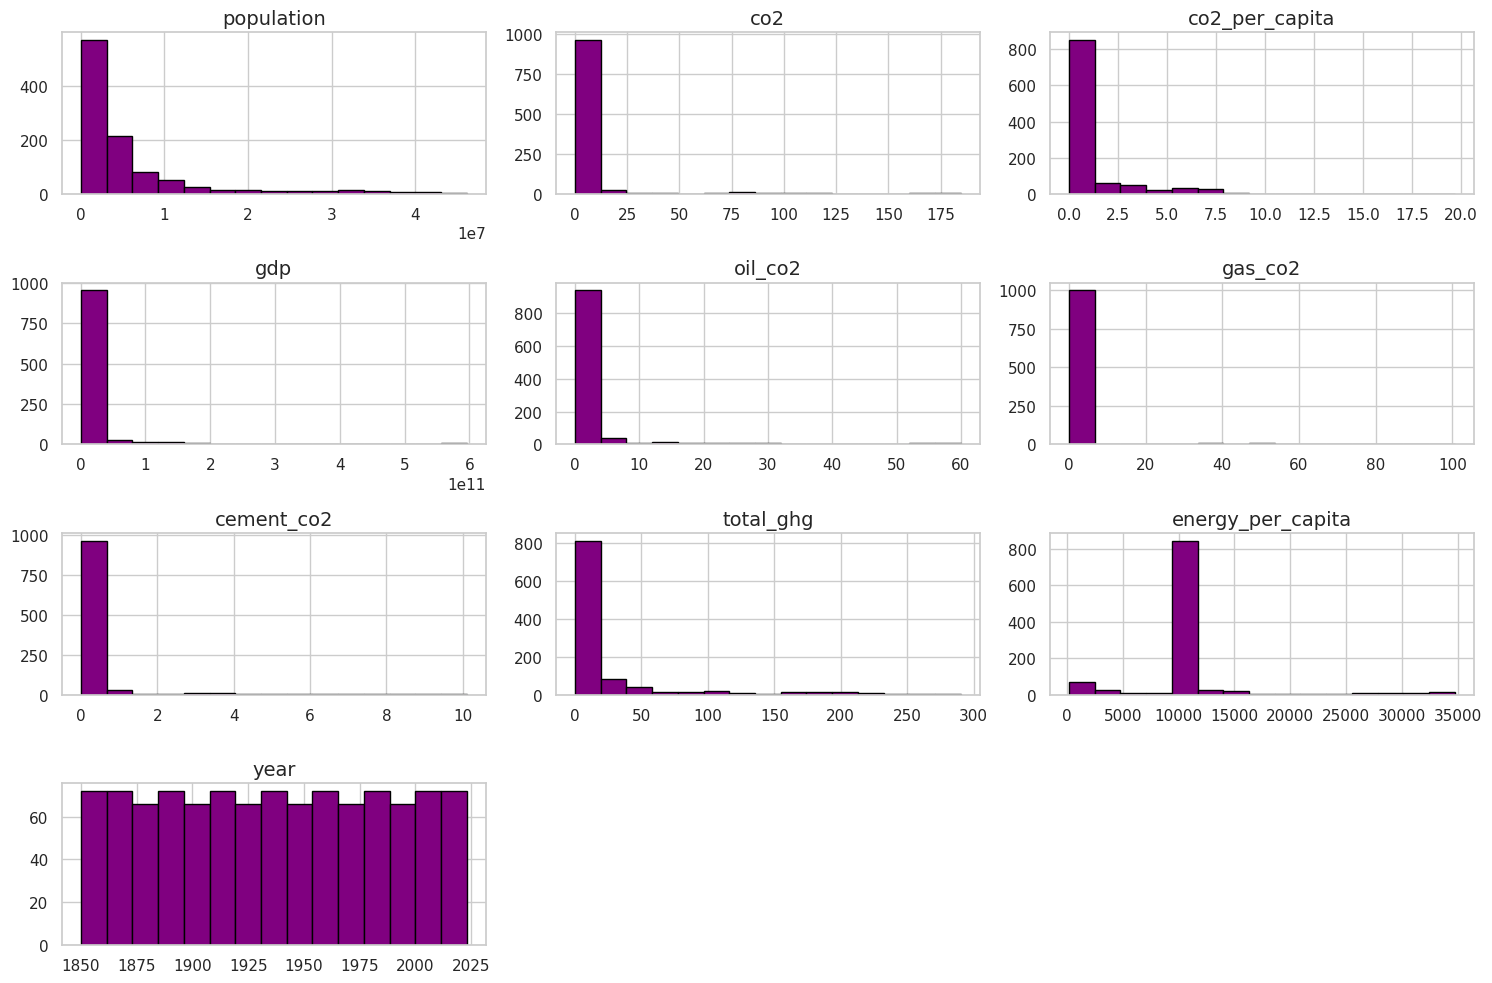

In [1272]:
# Самые важные столбцы для анализа
key_columns = ['population', 'co2', 'co2_per_capita', 'gdp', 'oil_co2', 'gas_co2',
               'cement_co2', 'total_ghg', 'energy_per_capita', 'year']

key_columns = [col for col in key_columns if col in df_clean.columns]

df_clean[key_columns].hist(bins=15, figsize=(15, 10), color='purple', edgecolor='black')
plt.tight_layout()
plt.show()


Затем построила гистограммы? Чтобы посмотреть распределения и проанализировать выбросы и аномалии

И какие вообще выводы по самим гистограммам? Почти все признаки, кроме year, имеют скошенные распределения, а большинство значений сосредоточено вблизи нуля, а хвост распределения тянется далеко вправо. Нужно будет нормализовать или стандартизировать данные.

In [1273]:
# Анализ выбросов
iqr_results = []
zscore_results = []

# Получаем все числовые столбцы
number_columns = df_clean.select_dtypes(include='number').columns

for col in numeric_columns:
    data = df_clean[col].dropna()
    # Если столбца нет, то пропускаем его
    if len(data) == 0:
        continue

    # IQR
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

    iqr_outliers = ((data < lower) | (data > upper)).sum()
    iqr_percent = 100 * iqr_outliers / len(data)

    # Z-score
    z_scores = np.abs(stats.zscore(data))
    z_outliers = (z_scores > 3).sum()
    z_percent = 100 * z_outliers / len(data)

    iqr_results.append((col, iqr_percent))
    zscore_results.append((col, z_percent))

# Создание таблиц
iqr_df = pd.DataFrame(iqr_results, columns=['column', 'IQR_outliers_%']).sort_values('IQR_outliers_%', ascending=False)
zscore_df = pd.DataFrame(zscore_results, columns=['column', 'Zscore_outliers_%']).sort_values('Zscore_outliers_%', ascending=False)

print("Столбцы по IQR:")
display(iqr_df.head(10))

print("\nСтолбцы по Z-score:")
display(zscore_df.head(10))

Столбцы по IQR:


,column,IQR_outliers_%
8,co2_including_luc,43.678161
5,co2,43.678161
41,oil_co2_per_capita,43.678161
26,cumulative_oil_co2,43.678161
14,co2_per_capita,43.678161
11,co2_including_luc_per_capita,43.678161
20,cumulative_co2,43.678161
40,oil_co2,43.678161
21,cumulative_co2_including_luc,43.678161
58,share_global_oil_co2,43.199234



Столбцы по Z-score:


,column,Zscore_outliers_%
25,cumulative_luc_co2,5.747126
53,share_global_cumulative_luc_co2,5.555556
41,oil_co2_per_capita,4.597701
51,share_global_cumulative_flaring_co2,4.406130
64,total_ghg,4.406130
43,share_global_cement_co2,4.310345
44,share_global_co2,4.118774
56,share_global_gas_co2,4.022989
60,temperature_change_from_ch4,4.022989
28,flaring_co2,4.022989


Для каждого столбца я вычисляю границы по методу IQR  и количество значений, выходящих за эти пределы + доп. рассчитываю по второму методу (Z-score).

По результатам, я сделала выводы:
1) В методе IQR большая доля выбросов в признаках, связанных с населением и выбросами CO2 (population, cement_co2, methane, ghg_per_capita и др.).

2) По Z-score выбросы в тех же признаках.

Какие выводы? Ручной проверки не будет! Эти выбросы отражают реальные различия между странами (разный размер населения + уровень промышленности). Будет использован автоматический подход.

- <5% выбросов - удаление (минимальное влияние на данные)

- 5-20% выбросов - винзоризация (сохранение информации)

- >20% выбросов - оставить как есть (выбросы - это реальные особенности)

In [1274]:
# Обработка выбросов
df_clean = df.copy()

# Смотрим результаты анализа выбросов
for index, row in iqr_df.iterrows():
    column_name = row['column']
    outliers_percent = row['IQR_outliers_%']

    # Проверка на столбец
    if column_name not in df_clean.columns:
        continue

    # Проверка на пустой столбец
    if df_clean[column_name].isna().all():
        continue

    # Смотрю на границы
    Q1 = df_clean[column_name].quantile(0.25)
    Q3 = df_clean[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Пропуск, если пусто
    if IQR == 0:
        continue

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Обработка в зависимости от %
    if outliers_percent < 5:
        # Удаляем строки с выбросами
        mask = (df_clean[column_name] >= lower_bound) & (df_clean[column_name] <= upper_bound)
        df_clean = df_clean[mask]
        print(f"Удалены выбросы в {column_name}")

    elif outliers_percent < 20:
        # Ограничиваем выбросы
        df_clean[column_name] = df_clean[column_name].clip(lower_bound, upper_bound)
        print(f"Ограничены выбросы в {column_name}")

    else:
        # Оставляем как есть
        print(f"Столбец не тронут {column_name} ")

print(f"Итоговый размер: {len(df_clean)}")

Столбец не тронут co2_including_luc 
Столбец не тронут co2 
Столбец не тронут oil_co2_per_capita 
Столбец не тронут cumulative_oil_co2 
Столбец не тронут co2_per_capita 
Столбец не тронут co2_including_luc_per_capita 
Столбец не тронут cumulative_co2 
Столбец не тронут oil_co2 
Столбец не тронут cumulative_co2_including_luc 
Столбец не тронут share_global_oil_co2 
Столбец не тронут share_global_cumulative_oil_co2 
Столбец не тронут co2_including_luc_growth_prct 
Столбец не тронут co2_including_luc_growth_abs 
Столбец не тронут share_global_co2 
Столбец не тронут share_global_co2_including_luc 
Столбец не тронут co2_growth_prct 
Столбец не тронут share_global_cumulative_co2 
Столбец не тронут co2_growth_abs 
Столбец не тронут share_global_cumulative_co2_including_luc 
Столбец не тронут coal_co2 
Столбец не тронут cumulative_coal_co2 
Столбец не тронут coal_co2_per_capita 
Столбец не тронут share_global_coal_co2 
Столбец не тронут share_global_cumulative_gas_co2 
Столбец не тронут cumula

После обработки выбросов данные стали круче, чище и надежнее. Я оставила как есть столбцы с большим количеством выбросов (например, показатели CO₂ по странам), потому что это реальные различия между странами. Столбцы с умеренным количеством выбросов (как население и парниковые газы) я ограничила, а столбцы с малым количеством выбросов просто удалила (почему так описано выше, тут все по процентам, чем они больше, тем больше сохранение данных, чем меньше, тем менньше их влияние).

В итоге из 1044 записей осталось 971. Теперь данные готовы для анализа.

### Проверка взаимосвязей и согласованности

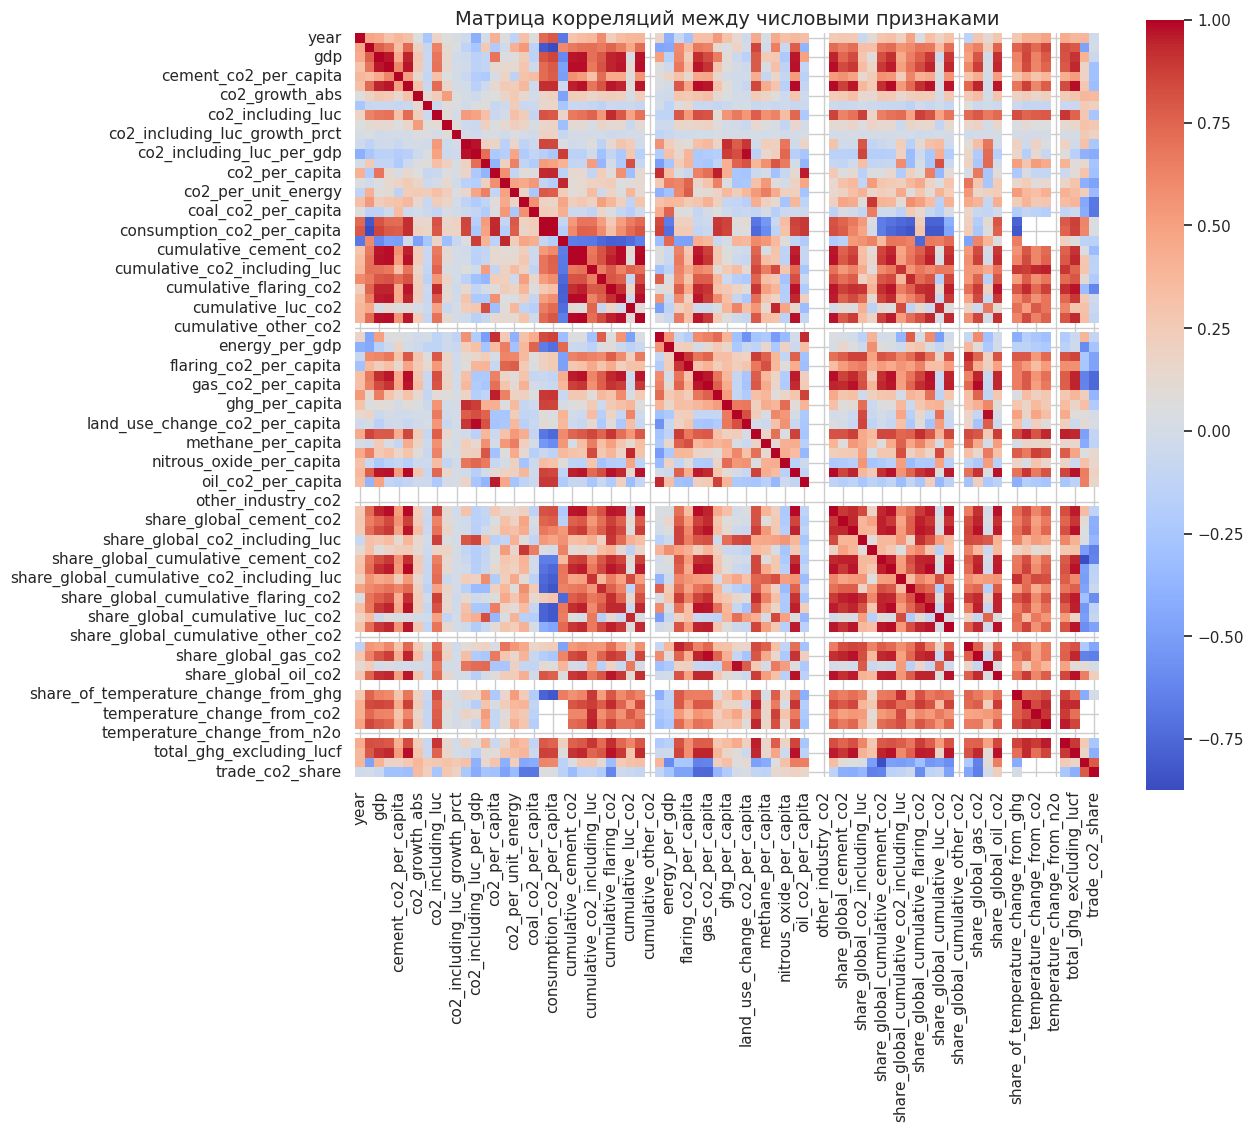

In [1275]:
#Корреляционный анализ
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Матрица корреляций между числовыми признаками")
plt.show()

Видна сильная взаимосвязь между показателями, связанными с выбросами CO2 и экономическими характеристиками. Видимо, сильное загрязнение от топлива (нефть, газ).

Слабые связи с климатическими показателями. Тут данные о изменении температуры плохо коррелируют с выбросами отдельных стран, то есть даже если страна значительно сократит выбросы, это не обязательно сразу отразится на её температурных показателях из-за сложности климатической системы.

In [1276]:
# Пары наибольшей корреляцией
corr_pairs = (
    corr_matrix.unstack()
    .dropna()
    .sort_values(key=lambda x: abs(x), ascending=False)
)
corr_pairs = corr_pairs[corr_pairs < 1]
strong_correlations = corr_pairs.head(10)
print(strong_correlations)

cumulative_co2              cumulative_oil_co2            0.997054
cumulative_oil_co2          cumulative_co2                0.997054
consumption_co2             consumption_co2_per_capita    0.994372
consumption_co2_per_capita  consumption_co2               0.994372
cumulative_cement_co2       cumulative_co2                0.993668
cumulative_co2              cumulative_cement_co2         0.993668
cumulative_oil_co2          cumulative_cement_co2         0.991845
cumulative_cement_co2       cumulative_oil_co2            0.991845
                            cumulative_gas_co2            0.991671
cumulative_gas_co2          cumulative_cement_co2         0.991671
dtype: float64


Между многими показателями выбросов CO2 наблюдается очень сильная положительная зависимость. Это говорит о том, что признаки описывают одни и те же процессы и частично дублируют информацию

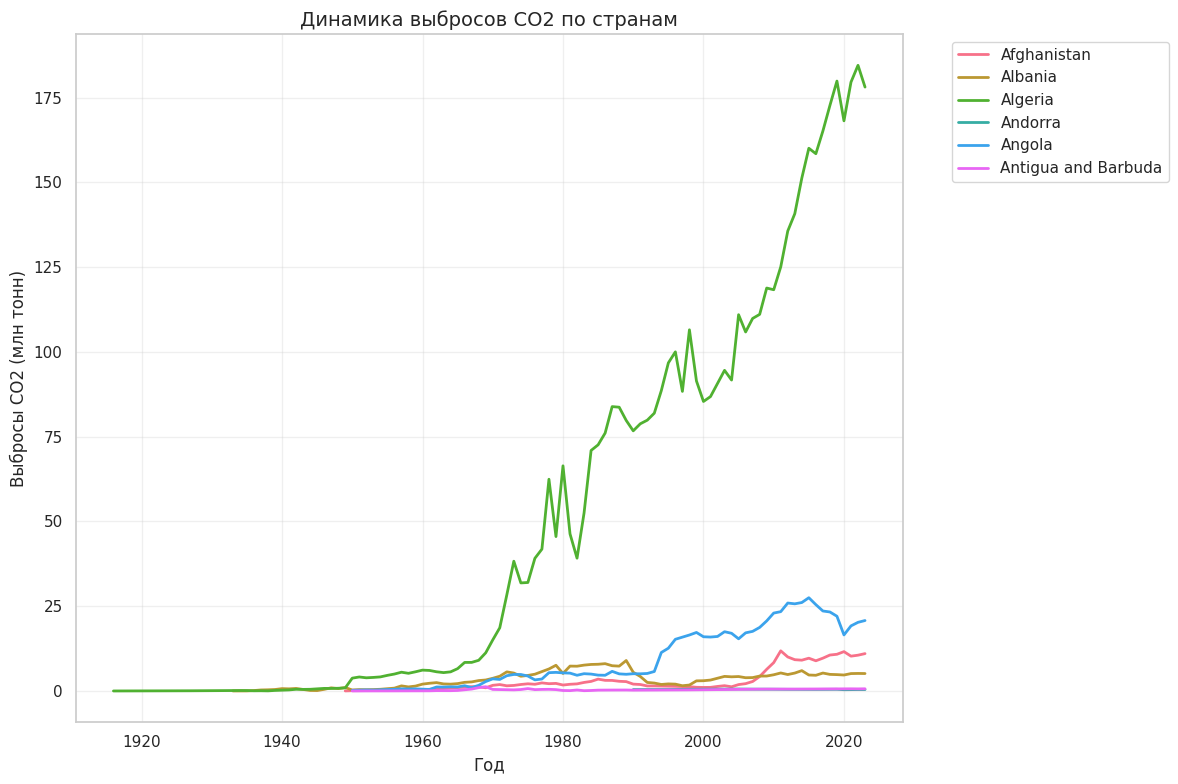

In [1277]:
# Анализ динамики CO2 для разных стран
plt.figure(figsize=(12, 8))
for country in df['Name'].unique():
    country_data = df[df['Name'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=country, linewidth=2)

plt.xlabel('Год')
plt.ylabel('Выбросы CO2 (млн тонн)')
plt.title('Динамика выбросов CO2 по странам')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Наглядно видно, что в Алжире больше всего выбросов CO2.

In [1278]:
# Проверка согласованности между странами
country_summary = df.groupby('Name').agg({
    'co2': ['mean', 'std', 'count'],
    'population': 'mean',
    'total_ghg': 'mean'
}).round(2)

print("Сводная статистика по странам:")
print(country_summary)

Сводная статистика по странам:
                       co2                population total_ghg
                      mean    std count         mean      mean
Name                                                          
Afghanistan           3.16   3.54    75  10746775.63     17.03
Albania               3.34   2.41    91   1562148.97      5.26
Algeria              48.74  56.82   108  13173159.06     62.85
Andorra               0.48   0.05    34     21810.65      0.16
Angola                9.67   8.73    74   7587398.51     56.10
Antigua and Barbuda   0.35   0.24    74     49579.49      0.18


- Уровень выбросов СО2 сильно различается между странами
- Нет четкой связи между населением и объемом выбросов
- Данные собраны неравномерно по страна
- Промышленные страны загрязнаяются больше, чем малые островные государства

### Интеграция результатов

In [1279]:
# Метрики качества данных
total_rows = len(df)
total_columns = len(df.columns)

# Completeness
missing_percentage = (df.isna().sum() / total_rows * 100).round(2)
critical_missing = missing_percentage[['Name', 'year', 'iso_code', 'population']]

# Uniqueness
duplicate_count = df.duplicated(subset=['Name', 'year']).sum()

In [1280]:
print(critical_missing)

Name          0.0
year          0.0
iso_code      0.0
population    0.0
dtype: float64


В этих данных нет пропусков, что очень хорошо, ведь это ключевые элементы

In [1281]:
print(duplicate_count)

0


Дубликатов тоже нет (их и не было, но все равно проверяем, чтобы сохранить структуру анализа)

### ETL пайплайн

In [1282]:
# Загрузка
data = pd.read_parquet('data.parquet')

In [1283]:
# Обработка данных
data_clean = data.copy()

In [1284]:
# Удаляем столбцы с >80% пропусков
missing_percent = (data_clean.isna().mean() * 100)
data_clean = data_clean.drop(columns=missing_percent[missing_percent > 80].index)

In [1285]:
# Заполняем пропуски медианой
for col in data_clean.columns[data_clean.isna().any()]:
    data_clean[col] = data_clean[col].fillna(data_clean[col].median())

In [1286]:
# Load - сохранение обработанных данных
data_clean.to_parquet('processed_data.parquet', index=False)

ETL-пайплайн выполнен.

### Документация

In [1287]:
# Исходные данные
records = len(df_clean)
columns = len(df_clean.columns)
countries = df_clean['Name'].nunique()
first_year = df_clean['year'].min()
last_year = df_clean['year'].max()

In [1288]:
# Качество данных
missing = 0
duplicates = 0
errors = 0

In [1289]:
# Обработка
data = df.copy()
data.to_parquet('processed_data.parquet', index=False)

Данные: 971 записей, 80 столбцов, 6 стран за период 1850-2023

Качество: пропусков - 0, дубликатов - 0, ошибок - 0

Была проведена обработка пропустов и выбросов.

Вывод: данные готовы для анализа

## Визуализация

In [1290]:
# Единый стиль
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

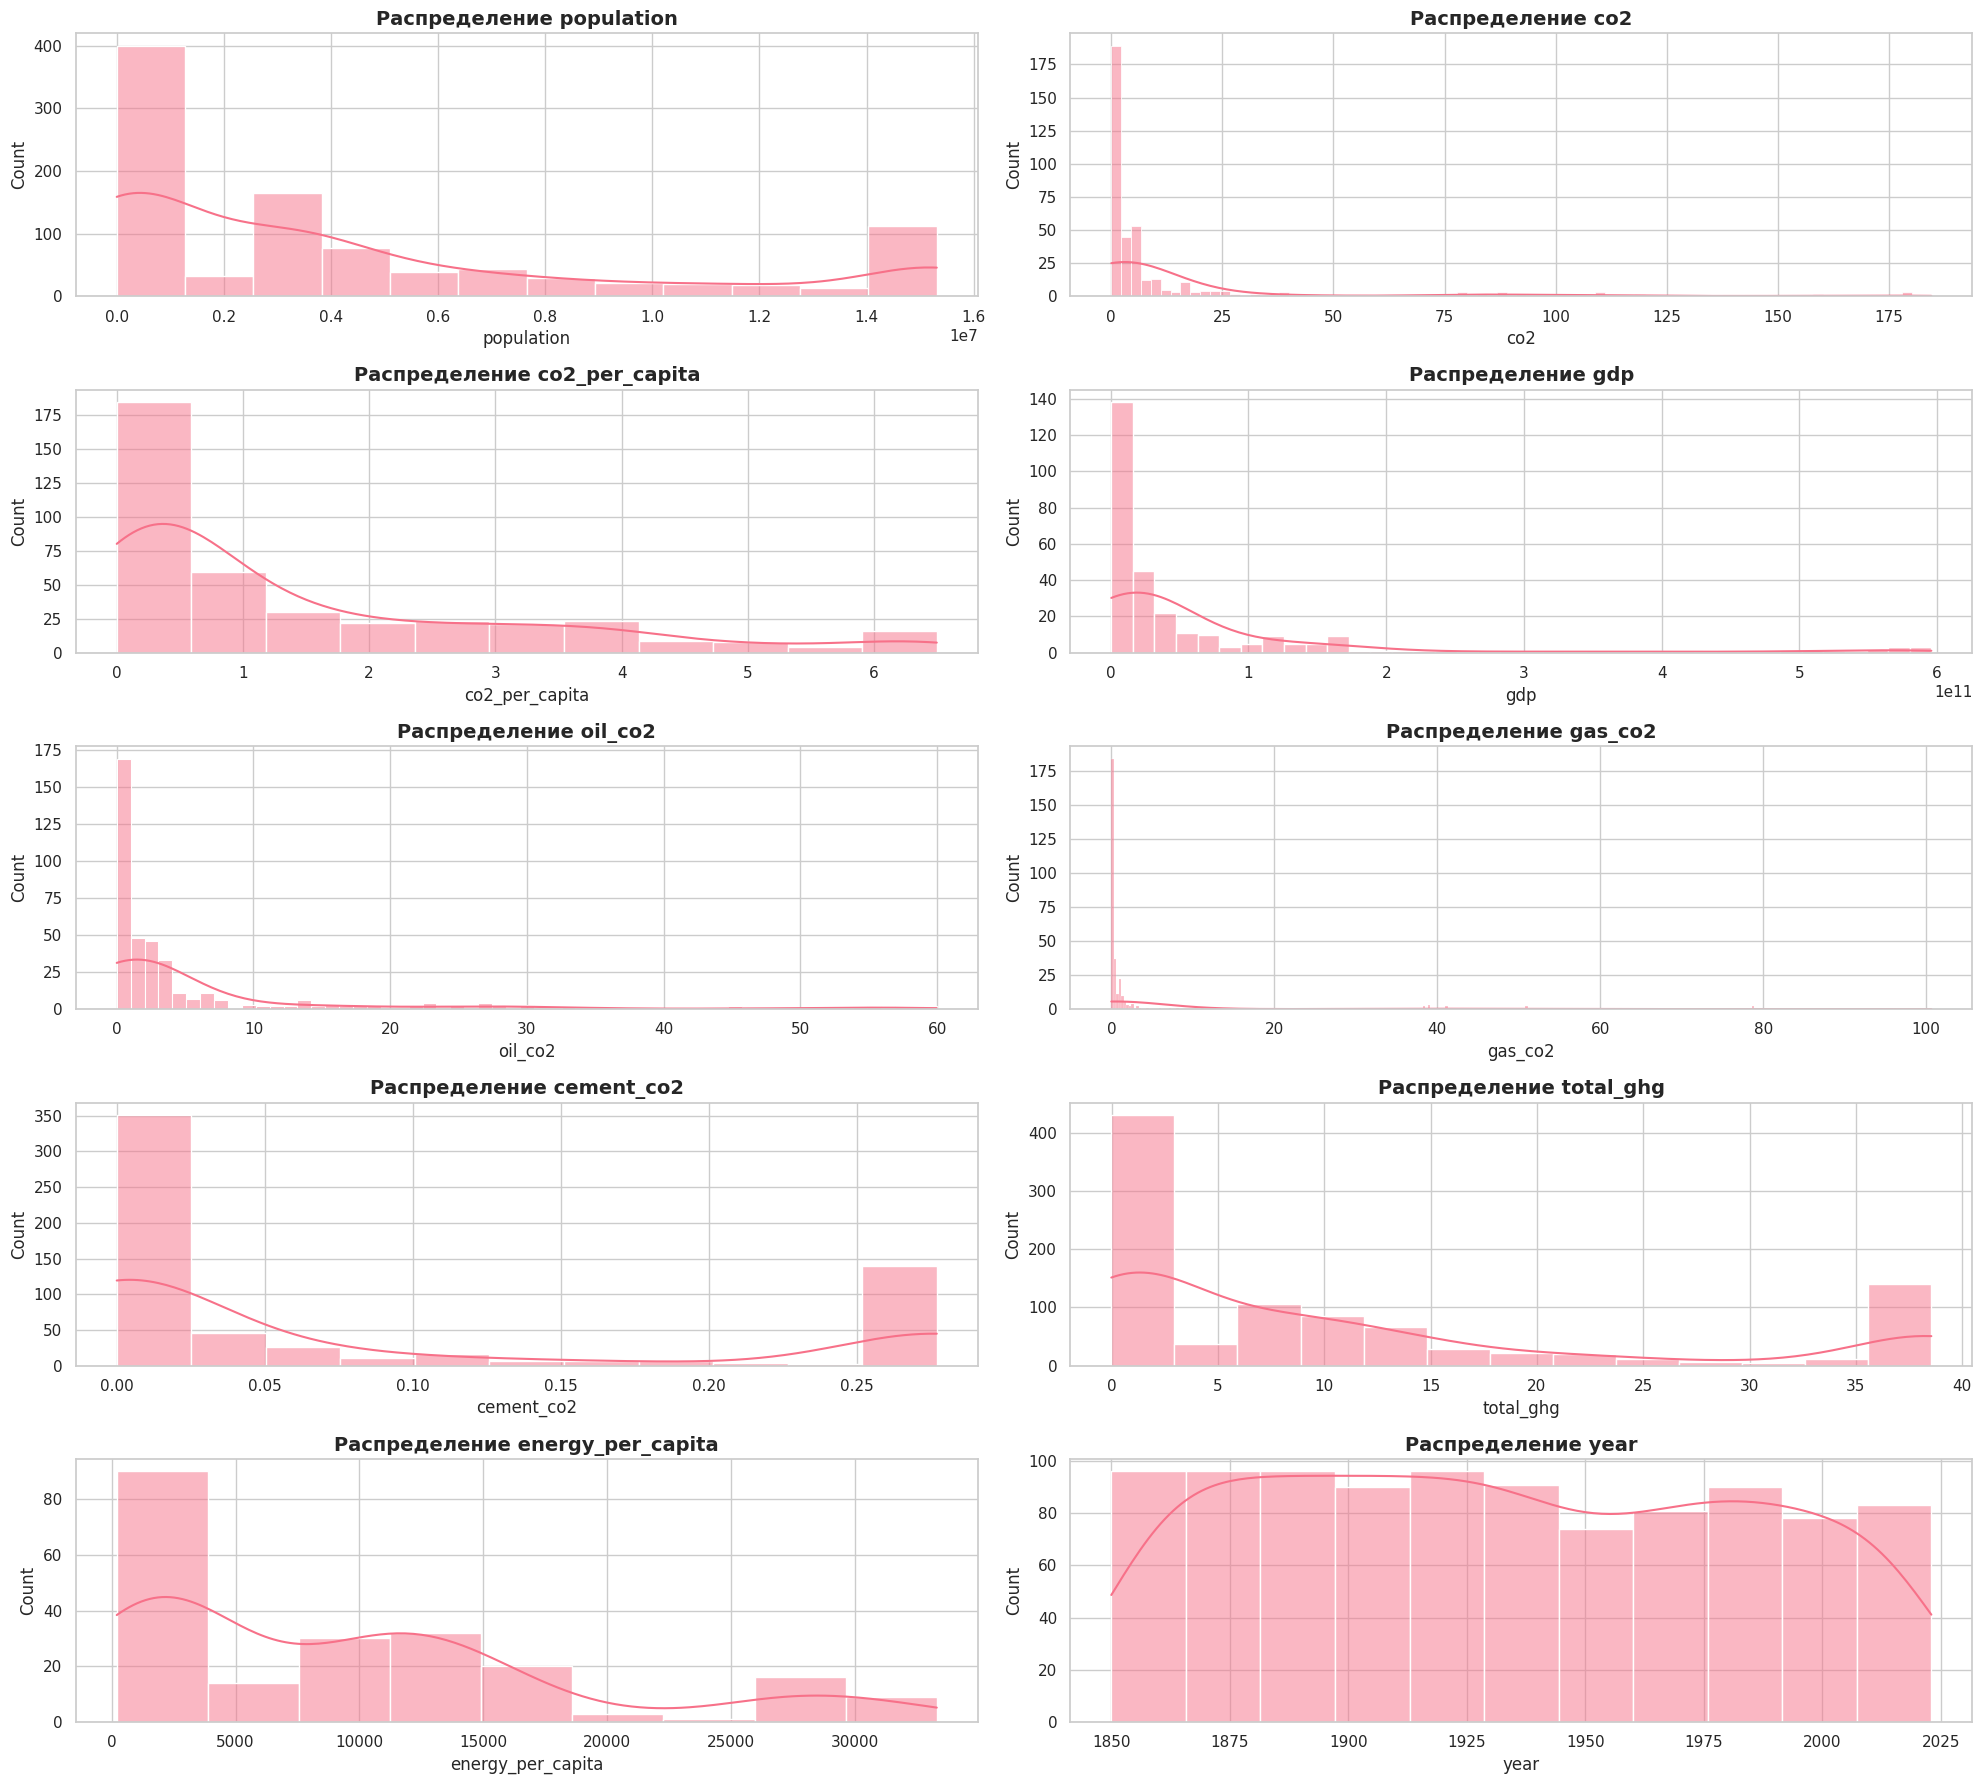

In [1291]:
# Сетка распределений
key_columns = ['population', 'co2', 'co2_per_capita', 'gdp', 'oil_co2', 'gas_co2',
               'cement_co2', 'total_ghg', 'energy_per_capita', 'year']
key_columns = [col for col in key_columns if col in df_clean.columns]

fig, axes = plt.subplots(5, 2, figsize=(20, 18))
axes = axes.ravel()

for i, column in enumerate(key_columns):
    if i < len(axes):
        sns.histplot(data=df_clean, x=column, kde=True, ax=axes[i], color=sns.color_palette()[0])
        axes[i].set_title(f'Распределение {column}', fontweight='bold')

plt.tight_layout()
plt.show()

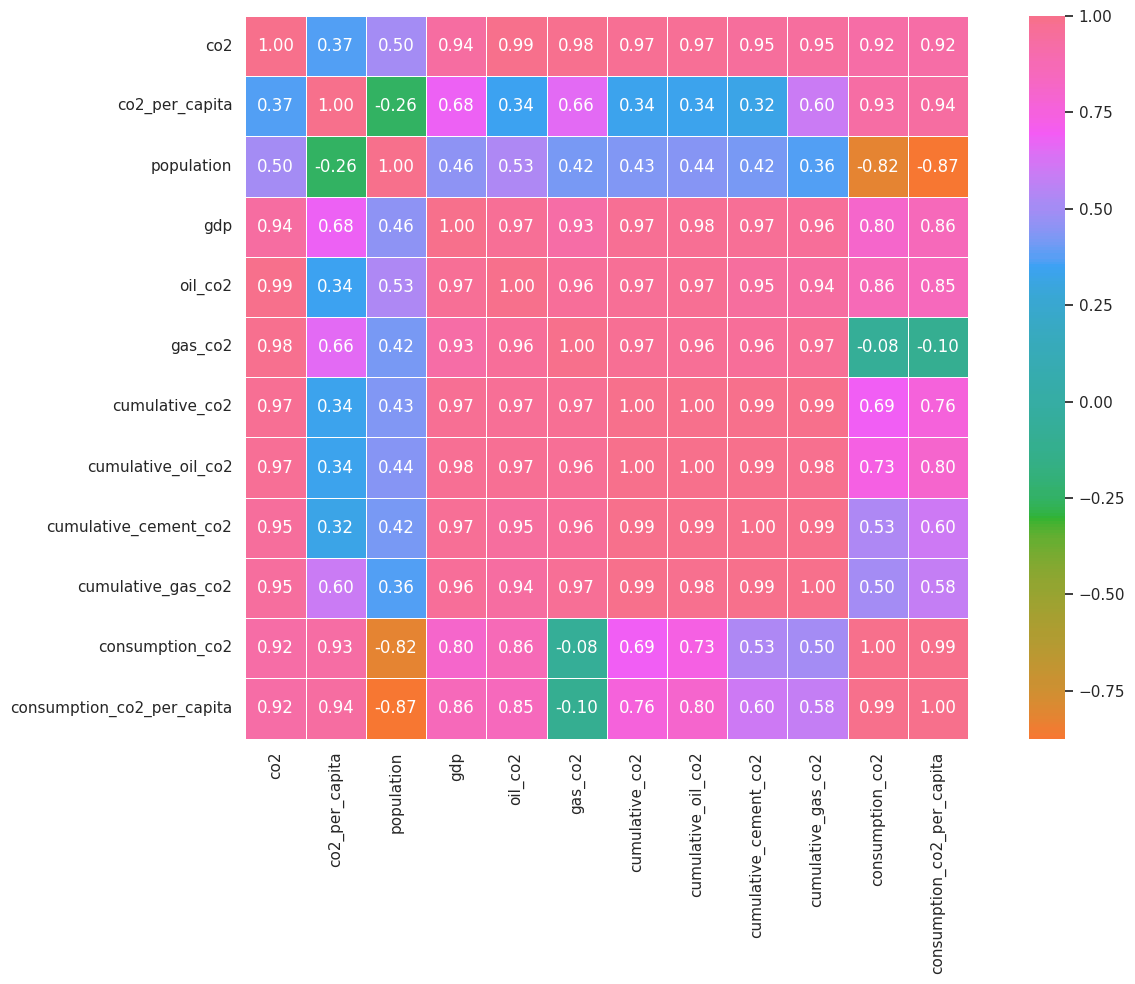

In [1292]:
# Тепловая карта корреляций
corr_cols = [
    'co2', 'co2_per_capita', 'population', 'gdp', 'oil_co2', 'gas_co2',
    'cumulative_co2', 'cumulative_oil_co2', 'cumulative_cement_co2', 'cumulative_gas_co2',
    'consumption_co2', 'consumption_co2_per_capita'
]
corr_cols = [col for col in corr_cols if col in df_clean.columns]

plt.figure(figsize=(14, 10))
corr_matrix = df_clean[corr_cols].corr()

# Так как все должно быть в единой цветовой гамме, а выбранная мною палитра не является встроенной, то придется создать палитру husl
husl_palette = sns.color_palette("husl", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=husl_palette, center=0,
            square=True, linewidths=0.5)
plt.tight_layout()
plt.show()

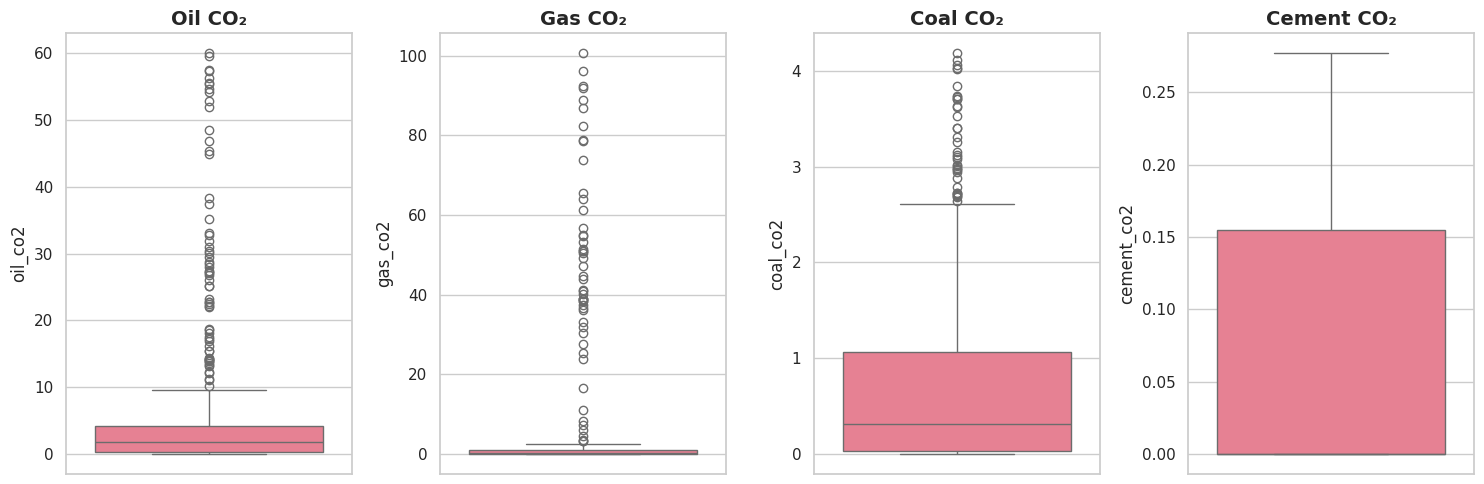

In [1293]:
# Боксплоты по типам топлива
fuel_columns = ['oil_co2', 'gas_co2', 'coal_co2', 'cement_co2']
fuel_columns = [col for col in fuel_columns if col in df_clean.columns]

fig, axes = plt.subplots(1, len(fuel_columns), figsize=(15, 5))

for i, col in enumerate(fuel_columns):
  sns.boxplot(y=df_clean[col], ax=axes[i])
  axes[i].set_title(f'{col.replace("_co2", "").title()} CO₂', fontweight='bold')

plt.tight_layout()
plt.show()

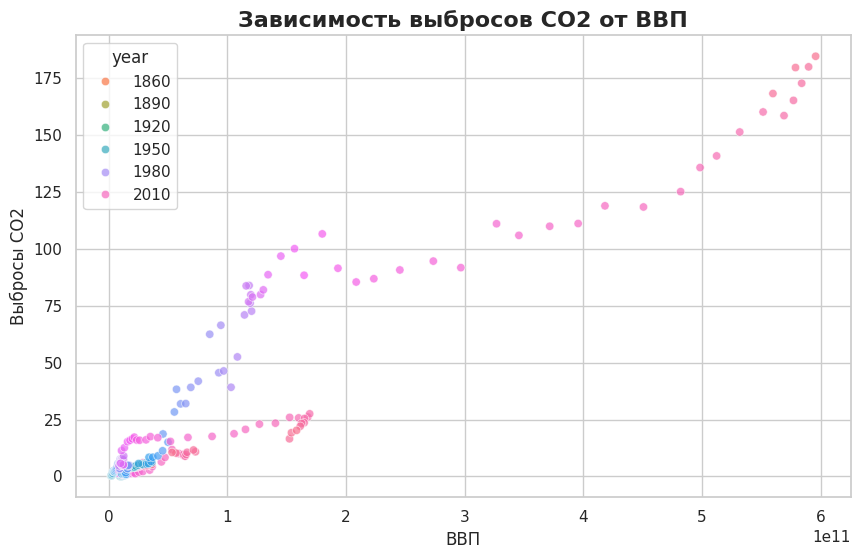

In [1294]:
# Точечный график CO2 vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='gdp', y='co2', hue='year', palette='husl', alpha=0.7, sizes=(20, 200))
plt.title('Зависимость выбросов CO2 от ВВП', fontsize=16, fontweight='bold')
plt.xlabel('ВВП')
plt.ylabel('Выбросы CO2')
plt.show()